### **Quick introduction to jupyter notebooks**
* Each cell in this notebook contains either code or text.
* You can run a cell by pressing Ctrl-Enter, or run and advance to the next cell with Shift-Enter.
* Code cells will print their output, including images, below the cell. Running it again deletes the previous output, so be careful if you want to save some results.
* You don't have to rerun all cells to test changes, just rerun the cell you have made changes to. Some exceptions might apply, for example if you overwrite variables from previous cells, but in general this will work.
* If all else fails, use the "Kernel" menu and select "Restart Kernel and Clear All Output". You can also use this menu to run all cells.
* A useful debug tool is the console. You can right-click anywhere in the notebook and select "New console for notebook". This opens a python console which shares the environment with the notebook, which let's you easily print variables or test commands.

### **Setup**

In [1]:
import os
import tensorflow as tf

# If there are multiple GPUs and we only want to use one/some, set the number in the visible device list.
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"

# This sets the GPU to allocate memory only as needed
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) != 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True) 

### **1. Loading the dataset**
This assignment will focus on the CIFAR10 dataset. This is a collection of small images in 10 classes such as cars, cats, birds, etc. You can find more information here: https://www.cs.toronto.edu/~kriz/cifar.html. We start by loading and examining the data.

In [2]:
import numpy as np
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print("Shape of training data:")

print(X_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(X_test.shape)
print(y_test.shape)

Shape of training data:
(50000, 32, 32, 3)
(50000, 1)
Shape of test data:
(10000, 32, 32, 3)
(10000, 1)


#### **<span style="color:red">Question 1:</span>**
The shape of X_train and X_test has 4 values. What do each of these represent?

#### **<span style="color:green">Answer:</span>**

The shape of X_train is (50000, 32, 32, 3), here 50000, represents the number of sample that means we have 50000 images to train the network. The next two values i.e, (32, 32) which represents the size of each image, so each image has the dimension of 32 × 32 which represents that each image has 1024 pixel. The other Value represents the colours of each pixel, i.e, the colour pallets of each pixel. In this case we are using the 3 colour pallets which are RGB(Red, Green, Blue).
Same for Test data, we have 10000 sample of images to test our network with the same features same the training data have.

##### **Plotting some images**
This plots a random selection of images from each class. Rerun the cell to see a different selection.

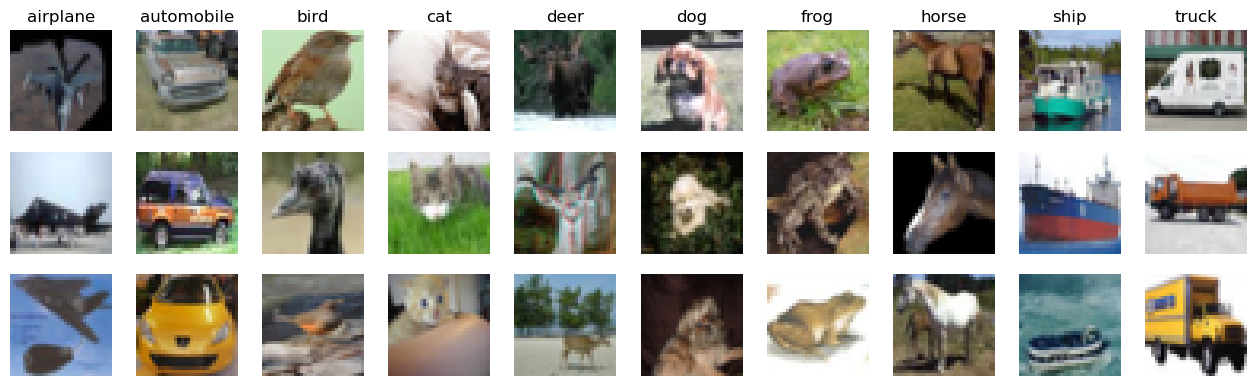

In [3]:
from Custom import PlotRandomFromEachClass

cifar_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
PlotRandomFromEachClass(X_train, y_train, 3, labels=cifar_labels)

##### **Preparing the dataset**
Just like the MNIST dataset we normalize the images to [0,1] and transform the class indices to one-hot encoded vectors.

In [4]:
from tensorflow.keras.utils import to_categorical

# Transform label indices to one-hot encoded vectors
y_train_c = to_categorical(y_train, num_classes=10)
y_test_c  = to_categorical(y_test , num_classes=10)

# Normalization of pixel values (to [0-1] range)
X_train = X_train.astype('float32') / 255
X_test  = X_test.astype('float32')  / 255

### **2. Fully connected classifier**
We will start by creating a fully connected classifier using the ```Dense``` layer. We give you the first layer that flattens the image features to a single vector. Add the remaining layers to the network.

Consider what the size of the output must be and what activation function you should use in the output layer.

In [5]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten

x_in = Input(shape=X_train.shape[1:])
x = Flatten()(x_in)

x = Dense(512, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(10, activation='softmax')(x)


# ============================================

model = Model(inputs=x_in, outputs=x)

# Now we build the model using Stochastic Gradient Descent with Nesterov momentum. We use accuracy as the metric.
sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary(100)

Model: "model"
____________________________________________________________________________________________________
 Layer (type)                                Output Shape                            Param #        
 input_1 (InputLayer)                        [(None, 32, 32, 3)]                     0              
                                                                                                    
 flatten (Flatten)                           (None, 3072)                            0              
                                                                                                    
 dense (Dense)                               (None, 512)                             1573376        
                                                                                                    
 dense_1 (Dense)                             (None, 128)                             65664          
                                                                            

##### **Training the model**
In order to show the differences between models in the first parts of the assignment, we will restrict the training to the following command using 15 epochs, batch size 32, and 20% validation data. From section 5 and forward you can change this as you please to increase the accuracy, but for now stick with this command.

In [6]:
history = model.fit(X_train,y_train_c, epochs=20, batch_size=32, verbose=1, validation_split=0.2)

Epoch 1/20


2024-02-09 10:01:51.319604: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1250/1250 [==============================] - 7s 5ms/step - loss: 1.8574 - accuracy: 0.3271 - val_loss: 1.8055 - val_accuracy: 0.3537
Epoch 2/20
1250/1250 [==============================] - 6s 5ms/step - loss: 1.6979 - accuracy: 0.3879 - val_loss: 1.6799 - val_accuracy: 0.3970
Epoch 3/20
1250/1250 [==============================] - 6s 5ms/step - loss: 1.6253 - accuracy: 0.4171 - val_loss: 1.6458 - val_accuracy: 0.4137
Epoch 4/20
1250/1250 [==============================] - 6s 5ms/step - loss: 1.5681 - accuracy: 0.4351 - val_loss: 1.5703 - val_accuracy: 0.4421
Epoch 5/20
1250/1250 [==============================] - 6s 5ms/step - loss: 1.5265 - accuracy: 0.4502 - val_loss: 1.5898 - val_accuracy: 0.4361
Epoch 6/20
1250/1250 [==============================] - 6s 5ms/step - loss: 1.4901 - accuracy: 0.4671 - val_loss: 1.5369 - val_accuracy: 0.4504
Epoch 7/20
1250/1250 [==============================] - 6s 5ms/step - loss: 1.4625 - accuracy: 0.4737 - val_loss: 1.5531 - val_accuracy: 0.4487
Epo

##### **Evaluating the model**
We use ```model.evaluate``` to get the loss and metric scores on the test data. To plot the results we give you a custom function that does the work for you.

In [7]:
score = model.evaluate(X_test, y_test_c, batch_size=128, verbose=0)

for i in range(len(score)):
    print("Test " + model.metrics_names[i] + " = %.3f" % score[i])

Test loss = 1.515
Test accuracy = 0.474


313/313 [==============================] - 0s 1ms/step


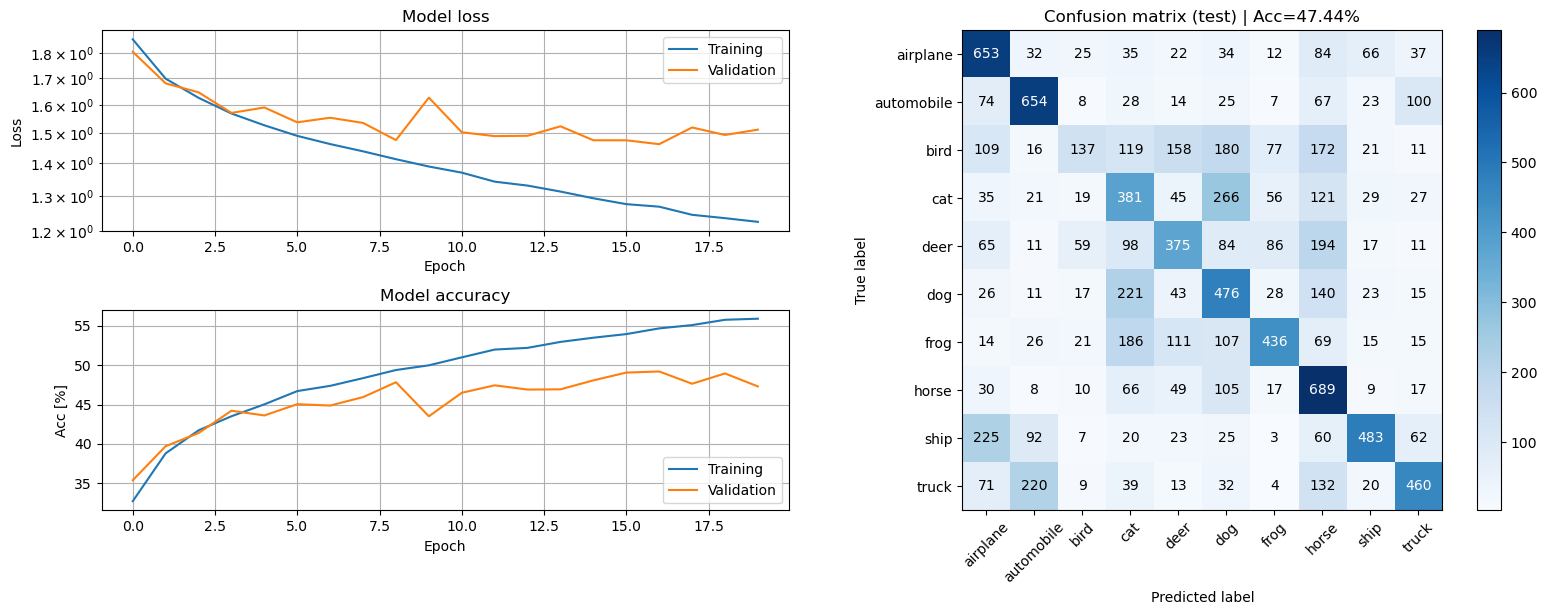

In [8]:
from Custom import PlotModelEval

# Custom function for evaluating the model and plotting training history
PlotModelEval(model, history, X_test, y_test, cifar_labels)

#### **<span style="color:red">Question 2:</span>**
Train a model that achieves above 45% accuracy on the test data. Provide a (short) motivation of your model architecture and briefly discuss the results.

#### **<span style="color:green">Answer:</span>**
In this model we have used the 3 dense layers and then one output layer of 10 nodes as we have 10 different classes in the data set.
After the input layer, we flatten the output of input layer, as we can see that it will result in 3072 features for an image, Thus we think that we should gradually decrease the number of nodes in layers. Thus, the network can learn the hidden feature and classify the images in proper classes. In hidden layers we use the relu as activation function, which induce the non-linearity which helps in classification. In the output layer, we have used softmax as activation function which return the values between [0, 1] and classfying the sample in each classes.

#### **<span style="color:red">Question 3:</span>**
Compare this model to the one you used for the MNIST dataset in the first assignment, in terms of size and test accuracy. Why do you think this dataset is much harder to classify than the MNIST handwritten digits?

#### **<span style="color:green">Answer:</span>**
To compare the model used in MNIST with this model. The model, to classify the MNIST database, uses a hidden dense layer of 64 nodes and an output layer of 10 nodes. Which gives the test accuracy of around 97%. Whereas, our model used 3 hidden Dense layers of 512, 128 and 64 node respectively and an output layer of 10 nodes. Which still gives the test accuracy of around 48%. This data set is way harder to classify than in MNIST database due to the different between the number of features to learn by the network. In MNIST database the shape of any image is [28,28]  which results in 784 features to learn, whereas the shape of each image in this database is [32, 32, 3] which results in 3072 features to learn by neural network. Thus, This database is much harder to classify compared to the MNIST database. Even if the feature difference will be taken care, Then also the objects in this data base is much complex then the handwritten digits in MNIST database. Thus, This database is hard to classify with just a fully connected network. we need a CNN network to classify this kind of databse.

### **3. CNN classifier**
We will now move on to a network architecture that is more suited for this problem, the convolutional neural network. The new layers you will use are ```Conv2D``` and ```MaxPooling2D```, which you can find the documentation of here https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D and here https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D.

##### **Creating the CNN model**

A common way to build convolutional neural networks is to create blocks of layers of the form **[convolution - activation - pooling]**, and then stack several of these block to create the full convolution stack. This is often followed by a fully connected network to create the output classes. Use this recipe to build a CNN that acheives at least 62% accuracy on the test data.

*Side note. Although this is a common way to build CNNs, it is be no means the only or even best way. It is a good starting point, but later in part 5 you might want to explore other architectures to acheive even better performance.*

In [9]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

x_in = Input(shape=X_train.shape[1:])

x = Conv2D(32, (3, 3), activation='relu', padding='same')(x_in)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)


x = Flatten()(x)

x = Dense(128, activation='relu')(x)
x = Dense(10, activation='softmax')(x)

model = Model(inputs=x_in, outputs=x)

sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)
model.summary(100)

Model: "model_1"
____________________________________________________________________________________________________
 Layer (type)                                Output Shape                            Param #        
 input_2 (InputLayer)                        [(None, 32, 32, 3)]                     0              
                                                                                                    
 conv2d (Conv2D)                             (None, 32, 32, 32)                      896            
                                                                                                    
 max_pooling2d (MaxPooling2D)                (None, 16, 16, 32)                      0              
                                                                                                    
 conv2d_1 (Conv2D)                           (None, 16, 16, 64)                      18496          
                                                                          

##### **Training the CNN**

In [10]:
history = model.fit(X_train, y_train_c, batch_size=32, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
1250/1250 [==============================] - 16s 13ms/step - loss: 1.5116 - accuracy: 0.4554 - val_loss: 1.2231 - val_accuracy: 0.5666
Epoch 2/10
1250/1250 [==============================] - 16s 13ms/step - loss: 1.0874 - accuracy: 0.6167 - val_loss: 1.0544 - val_accuracy: 0.6358
Epoch 3/10
1250/1250 [==============================] - 16s 12ms/step - loss: 0.9215 - accuracy: 0.6720 - val_loss: 0.9756 - val_accuracy: 0.6557
Epoch 4/10
1250/1250 [==============================] - 16s 12ms/step - loss: 0.7776 - accuracy: 0.7249 - val_loss: 0.9917 - val_accuracy: 0.6623
Epoch 5/10
1250/1250 [==============================] - 16s 13ms/step - loss: 0.6492 - accuracy: 0.7718 - val_loss: 0.9906 - val_accuracy: 0.6800
Epoch 6/10
1250/1250 [==============================] - 16s 13ms/step - loss: 0.5311 - accuracy: 0.8136 - val_loss: 1.0120 - val_accuracy: 0.6877
Epoch 7/10
1250/1250 [==============================] - 16s 12ms/step - loss: 0.4198 - accuracy: 0.8505 - val_loss: 1.1091 -

##### **Evaluating the CNN**

In [11]:
score = model.evaluate(X_test, y_test_c, batch_size=128, verbose=0)

for i in range(len(score)):
    print("Test " + model.metrics_names[i] + " = %.3f" % score[i])

Test loss = 1.611
Test accuracy = 0.676


313/313 [==============================] - 1s 4ms/step


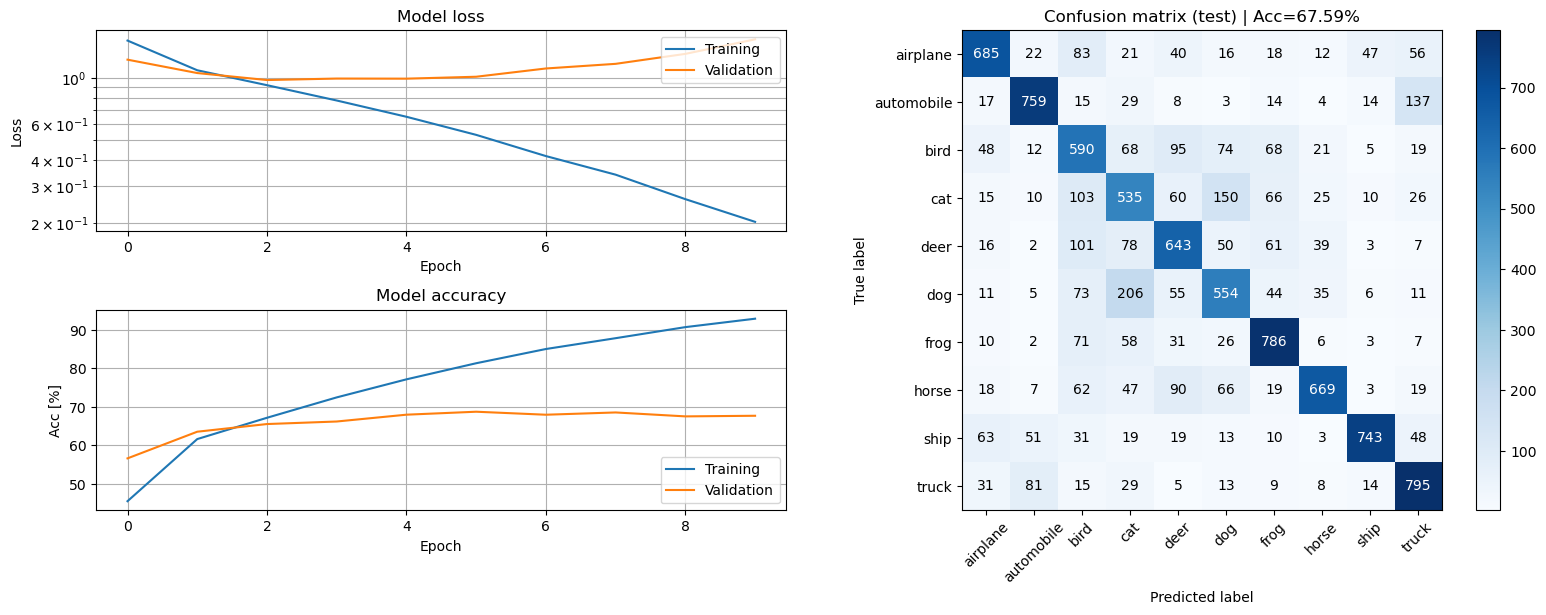

In [12]:
PlotModelEval(model, history, X_test, y_test, cifar_labels)

#### **<span style="color:red">Question 4:</span>**
Train a model that achieves at least 62% test accuracy. Provide a (short) motivation of your model architecture and briefly discuss the results.

#### **<span style="color:green">Answer:</span>**
The model architecture uses the 2 block of layers of the form **[convolution - activation - pooling]**. Here in the first block of convolution, we are using the 32 kernels and in the second block we are using the 64 kernels. Here we are using relu as activation function to induce the non-linearity. These layers will extract the features from a sample, Thus provided generalisation power to the network. Then to classify the samples, we will use a dense network of 128 nodes to map these features to classify them into different classes. Here also, we use the relu as the activation function. Then, we have a  output layer with 10 nodes represents the 10 different classes in the data set. We use softmax as activation funtion to get the values [0,1] to classify the sample in particular class.

#### **<span style="color:red">Question 5:</span>**
Compare this model with the previous fully connected model. You should find that this one is much more efficient, i.e. achieves higher accuracy with fewer parameters. Explain in your own words how this is possible.

#### **<span style="color:green">Answer:</span>**
This model consist of a 2 block of layers of the form [convolution - activation - pooling]. Followed by the dense layer of 128 nodes and then the output layer of 10 nodes. Whereas, in the previous fully connected model, we had the dense 3 layers of with 512, 128, 64 as the number of nodes respectively. This network is able to achieve the good accuracy as the CNN model uses the convolution payers followed by max pooling layer, which are capable to capture the special features and dependencies present in the raw data. Thus, captures different small patterns present in an image, and eventually results in better accuracy in less number of parameters compared to a fully connected network.

### **4. Regularization**

#### **4.1 Dropout**
You have probably seen that your CNN model overfits the training data. One way to prevent this is to add ```Dropout``` layers to the model, that randomly "drops" hidden nodes each training-iteration by setting their output to zero. Thus the model cannot rely on a small set of very good hidden features, but must instead learns to use different sets of hidden features each time. Dropout layers are usually added after the pooling layers in the convolution part of the model, or after activations in the fully connected part of the model.

*Side note. In the next assignment you will work with Ensemble models, a way to use the output from several individual models to achieve higher performance than each model can achieve on its own. One way to interpret Dropout is that each random selection of nodes is a separate model that is trained only on the current iteration. The final output is then the average of outputs from all the individual models. In other words, Dropout can be seen as a way to build ensembling directly into the network, without having to train several models explicitly.*

Extend your previous model with the Dropout layer and test the new performance.

In [13]:
from tensorflow.keras.layers import Dropout


x_in = Input(shape=X_train.shape[1:])

x = Conv2D(32, (3, 3), activation='relu', padding='same')(x_in)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)


x = Flatten()(x)

x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(10, activation='softmax')(x)

model = Model(inputs=x_in, outputs=x)

sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)
model.summary(100)

Model: "model_2"
____________________________________________________________________________________________________
 Layer (type)                                Output Shape                            Param #        
 input_3 (InputLayer)                        [(None, 32, 32, 3)]                     0              
                                                                                                    
 conv2d_2 (Conv2D)                           (None, 32, 32, 32)                      896            
                                                                                                    
 max_pooling2d_2 (MaxPooling2D)              (None, 16, 16, 32)                      0              
                                                                                                    
 dropout (Dropout)                           (None, 16, 16, 32)                      0              
                                                                          

In [14]:
history = model.fit(X_train, y_train_c, batch_size=32, epochs=15, verbose=1, validation_split=0.2)

Epoch 1/15
1250/1250 [==============================] - 16s 12ms/step - loss: 1.7988 - accuracy: 0.3378 - val_loss: 1.4569 - val_accuracy: 0.4728
Epoch 2/15
1250/1250 [==============================] - 15s 12ms/step - loss: 1.4822 - accuracy: 0.4605 - val_loss: 1.3107 - val_accuracy: 0.5219
Epoch 3/15
1250/1250 [==============================] - 16s 13ms/step - loss: 1.3604 - accuracy: 0.5093 - val_loss: 1.2229 - val_accuracy: 0.5754
Epoch 4/15
1250/1250 [==============================] - 16s 13ms/step - loss: 1.2688 - accuracy: 0.5475 - val_loss: 1.0878 - val_accuracy: 0.6122
Epoch 5/15
1250/1250 [==============================] - 16s 13ms/step - loss: 1.2055 - accuracy: 0.5703 - val_loss: 1.0952 - val_accuracy: 0.6219
Epoch 6/15
1250/1250 [==============================] - 16s 13ms/step - loss: 1.1555 - accuracy: 0.5884 - val_loss: 1.0016 - val_accuracy: 0.6472
Epoch 7/15
1250/1250 [==============================] - 17s 13ms/step - loss: 1.1064 - accuracy: 0.6077 - val_loss: 0.9888 -

In [15]:
score = model.evaluate(X_test, y_test_c, batch_size=128, verbose=0)

for i in range(len(score)):
    print("Test " + model.metrics_names[i] + " = %.3f" % score[i])

Test loss = 0.870
Test accuracy = 0.695


313/313 [==============================] - 1s 4ms/step


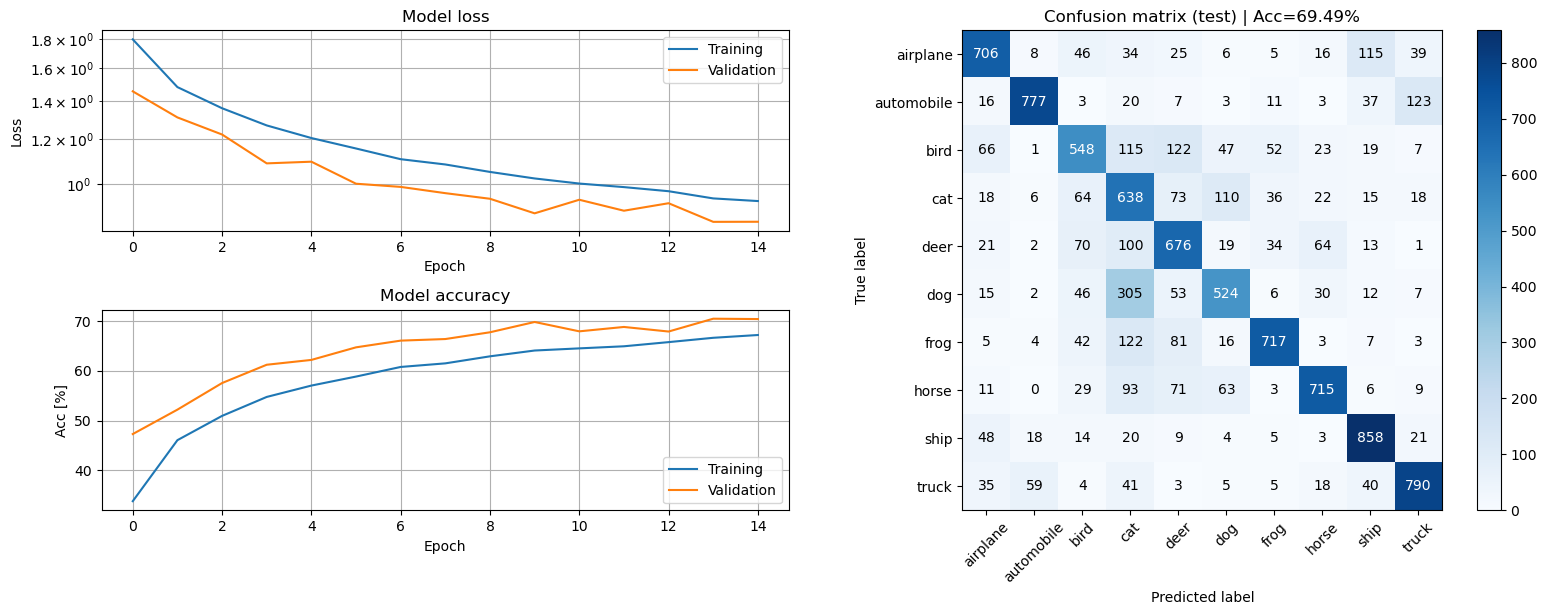

In [16]:
PlotModelEval(model, history, X_test, y_test, cifar_labels)

#### **<span style="color:red">Question 6:</span>**
Compare this model and the previous in terms of the training accuracy, validation accuracy, and test accuracy. Explain the similarities and differences (remember that the only difference between the models should be the addition of Dropout layers).

Hint: what does the dropout layer do at test time?

#### **<span style="color:green">Answer:</span>**
In this model we have Dropout layers in each convolution block as well as in the final dense layer. In the convolution block we dropout 25% nodes and in dense layers we dropout 50% nodes during training. As we can see that there was high difference between the training and validation accuracy of previous model. Which represents the overfitting of the network. Whereas, in this network the difference between the validation and training accuracy is low which represents that the network is not overfitting the training data. In the same way, the test accuracy has is almost same in both the model and almost same with the validation accuracy. which represents that the network is able to generalize the patter and does not overfit the training data.

#### **4.2 Batch normalization**
The final layer we will explore is ```BatchNormalization```. As the name suggests, this layer normalizes the data in each batch to have a specific mean and standard deviation, which is learned during training. The reason for this is quite complicated (and still debated among the experts), but suffice to say that it helps the optimization converge faster which means we get higher performance in fewer epochs. The normalization is done separatly for each feature, i.e. the statistics are calculated accross the batch dimension of the input data. The equations for batch-normalizing one feature are the following, where $N$ is the batch size, $x$ the input features, and $y$ the normalized output features:

$$ \mu = \frac{1}{N} \sum_{i=0}^{N}x_i,\;\;\;\; \sigma^2 = \frac{1}{N} \sum_{i=0}^{N}(x_i - \mu)^2 $$

$$ \hat{x}_i = \frac{x_i - \mu}{\sqrt{\sigma^2 + \epsilon}} $$

$$ y_i = \gamma \hat{x}_i + \beta $$

At first glance this might look intimidating, but all it means is that we begin by scaling and shifting the data to have mean $\mu=0$ and standard deviation $\sigma=1$. After this we use the learnable parameters $\gamma$ and $\beta$ to decide the width and center of the final distribution. $\epsilon$ is a small constant value that prevents the denominator from being zero.

In addition to learning the parameters $\gamma$ and $\beta$ by gradient decent just like the weights, Batch Normalization also keeps track of the running average of minibatch statistics $\mu$ and $\sigma$. These averages are used to normalize the test data. We can tune the rate at which the running averages are updated with the *momentum* parameter of the BatchNormalization layer. A large momentum means that the statistics converge more slowly and therefore requires more updates before it represents the data. A low momentum, on the other hand, adapts to the data more quickly but might lead to unstable behaviour if the latest minibatches are not representative of the whole dataset. For this test we recommend a momentum of 0.75, but you probably want to change this when you design a larger network in Section 5.

The batch normalization layer should be added after the hidden layer linear transformation, but before the nonlinear activation. This means that we cannot specify the activation funciton in the ```Conv2D``` or ```Dense``` if we want to batch-normalize the output. We therefore need to use the ```Activation``` layer to add a separate activation to the network stack after batch normalization. For example, the convolution block will now look like **[conv - batchnorm - activation - pooling]**.

Extend your previous model with batch normalization, both in the convolution and fully connected part of the model.

In [17]:
from tensorflow.keras.layers import BatchNormalization, Activation

x_in = Input(shape=X_train.shape[1:])

x = Conv2D(32, (3, 3), padding='same')(x_in)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)


x = Conv2D(64, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Flatten()(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dense(10, activation='softmax')(x)

model = Model(inputs=x_in, outputs=x)

sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)
model.summary(100)

Model: "model_3"
____________________________________________________________________________________________________
 Layer (type)                                Output Shape                            Param #        
 input_4 (InputLayer)                        [(None, 32, 32, 3)]                     0              
                                                                                                    
 conv2d_4 (Conv2D)                           (None, 32, 32, 32)                      896            
                                                                                                    
 batch_normalization (BatchNormalization)    (None, 32, 32, 32)                      128            
                                                                                                    
 activation (Activation)                     (None, 32, 32, 32)                      0              
                                                                          

In [18]:
history = model.fit(X_train, y_train_c, batch_size=32, epochs=15, verbose=1, validation_split=0.2)

Epoch 1/15
1250/1250 [==============================] - 20s 16ms/step - loss: 1.2493 - accuracy: 0.5558 - val_loss: 1.3872 - val_accuracy: 0.5222
Epoch 2/15
1250/1250 [==============================] - 20s 16ms/step - loss: 0.9073 - accuracy: 0.6819 - val_loss: 1.4835 - val_accuracy: 0.5398
Epoch 3/15
1250/1250 [==============================] - 20s 16ms/step - loss: 0.7532 - accuracy: 0.7354 - val_loss: 1.1480 - val_accuracy: 0.6211
Epoch 4/15
1250/1250 [==============================] - 20s 16ms/step - loss: 0.6334 - accuracy: 0.7784 - val_loss: 1.0700 - val_accuracy: 0.6447
Epoch 5/15
1250/1250 [==============================] - 20s 16ms/step - loss: 0.5344 - accuracy: 0.8131 - val_loss: 0.9762 - val_accuracy: 0.6777
Epoch 6/15
1250/1250 [==============================] - 20s 16ms/step - loss: 0.4414 - accuracy: 0.8474 - val_loss: 0.9200 - val_accuracy: 0.7105
Epoch 7/15
1250/1250 [==============================] - 20s 16ms/step - loss: 0.3619 - accuracy: 0.8739 - val_loss: 1.1104 -

In [19]:
score = model.evaluate(X_test, y_test_c, batch_size=128, verbose=0)

for i in range(len(score)):
    print("Test " + model.metrics_names[i] + " = %.3f" % score[i])

Test loss = 1.344
Test accuracy = 0.710


313/313 [==============================] - 2s 5ms/step


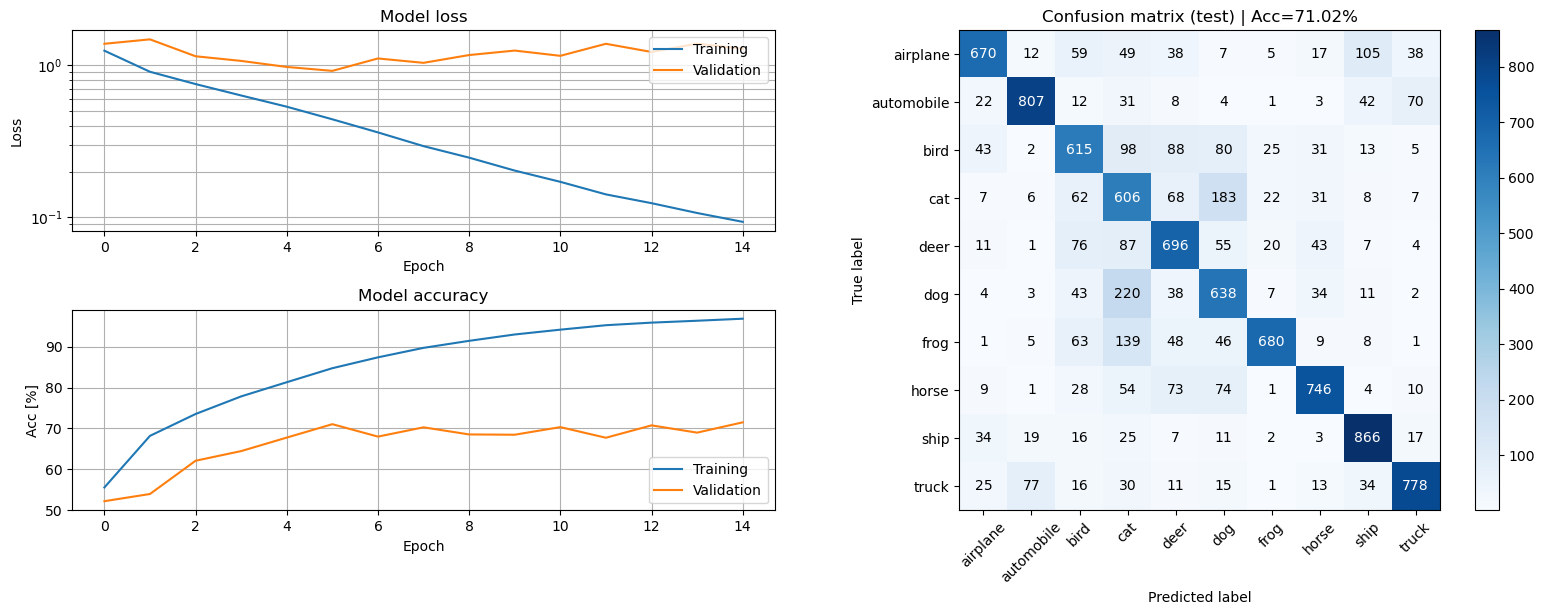

In [20]:
PlotModelEval(model, history, X_test, y_test, cifar_labels)

#### **<span style="color:red">Question 7:</span>**
When using BatchNorm one must take care to select a good minibatch size. Describe what problems might arise if:

1. The minibatch size is too small.
2. The minibatch size is too large.

You can reason about this given the description of BatchNorm above, or you can search for the information in other sources. Do not forget to provide links to the sources if you do!

#### **<span style="color:green">Answer:</span>**
There are different issues which can arise with different batch sizes, short explanations of these issues are as follows:
1. When minibatch size is too small:

   a. Increased variance: High variance in estimated mean and standard deviation of batch and the actual mean and standard deviation of the actual data set can lead to unstable update of model parameter during training.

   b. Flat minimum: Small batch size leads to slow convergence to the minima and reduces the generalization gap of the network, but Can take longer training time and may result in overfitting.

   c. Less smooth gradient update: Small sample size will result in noisy gradient estimate due to small number of sample. Which results in less smooth gradient update. Thus, slow down the convergence.

3. When minibatch size is too large:

   a. Computationally expensive: Large minibatch size will require the more computational power during training. Thus, increase the training time and resource consumption.

   b. Sharp minimum: Large batch size will converge sharply, which results in poor generalization power of Network. Thus, Network will not perform well on the unseen data

   c. Risk of Overfitting : The mean and standard deviation calculated with large size may represent the actual mean and standard deviation of the whole dataset. This can result in overfitting.

We have gettered this information from these 2 blogs:
https://medium.com/mini-distill/effect-of-batch-size-on-training-dynamics-21c14f7a716e
https://medium.com/geekculture/why-small-batch-sizes-lead-to-greater-generalization-in-deep-learning-a00a32251a4f

### **5. Putting it all together**
We now want you to create your own model based on what you have learned. We want you to experiment and see what works and what doesn't, so don't go crazy with the number of epochs until you think you have something that works.

To pass this assignment, we want you to acheive **75%** accuracy on the test data in no more than **25 epochs**. This is possible using the layers and techniques we have explored in this notebook, but you are free to use any other methods that we didn't cover. (You are obviously not allowed to cheat, for example by training on the test data.)

In [21]:
from tensorflow.keras.utils import plot_model


x_in = Input(shape=X_train.shape[1:])

x = Conv2D(64, (3, 3), padding='same')(x_in)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(128, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(256, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Flatten()(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)

x = Dense(64)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)


x = Dense(10, activation='softmax')(x)

model = Model(inputs=x_in, outputs=x)

sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)
model.summary(100)

Model: "model_4"
____________________________________________________________________________________________________
 Layer (type)                                Output Shape                            Param #        
 input_5 (InputLayer)                        [(None, 32, 32, 3)]                     0              
                                                                                                    
 conv2d_6 (Conv2D)                           (None, 32, 32, 64)                      1792           
                                                                                                    
 batch_normalization_3 (BatchNormalization)  (None, 32, 32, 64)                      256            
                                                                                                    
 activation_3 (Activation)                   (None, 32, 32, 64)                      0              
                                                                          

In [22]:
history = model.fit(X_train, y_train_c, batch_size=32, epochs=25, verbose=1, validation_split=0.2)

Epoch 1/25
1250/1250 [==============================] - 59s 46ms/step - loss: 1.7414 - accuracy: 0.3579 - val_loss: 1.7655 - val_accuracy: 0.3742
Epoch 2/25
1250/1250 [==============================] - 61s 49ms/step - loss: 1.4506 - accuracy: 0.4731 - val_loss: 1.4357 - val_accuracy: 0.4660
Epoch 3/25
1250/1250 [==============================] - 65s 52ms/step - loss: 1.3165 - accuracy: 0.5310 - val_loss: 1.1462 - val_accuracy: 0.5890
Epoch 4/25
1250/1250 [==============================] - 68s 54ms/step - loss: 1.2264 - accuracy: 0.5654 - val_loss: 1.4184 - val_accuracy: 0.5346
Epoch 5/25
1250/1250 [==============================] - 67s 54ms/step - loss: 1.1585 - accuracy: 0.5983 - val_loss: 1.0742 - val_accuracy: 0.6112
Epoch 6/25
1250/1250 [==============================] - 59s 47ms/step - loss: 1.0961 - accuracy: 0.6238 - val_loss: 0.9769 - val_accuracy: 0.6589
Epoch 7/25
1250/1250 [==============================] - 59s 47ms/step - loss: 1.0572 - accuracy: 0.6377 - val_loss: 1.2752 -

In [23]:
score = model.evaluate(X_test, y_test_c, batch_size=128, verbose=0)

for i in range(len(score)):
    print("Test " + model.metrics_names[i] + " = %.3f" % score[i])

Test loss = 0.579
Test accuracy = 0.801


313/313 [==============================] - 5s 14ms/step


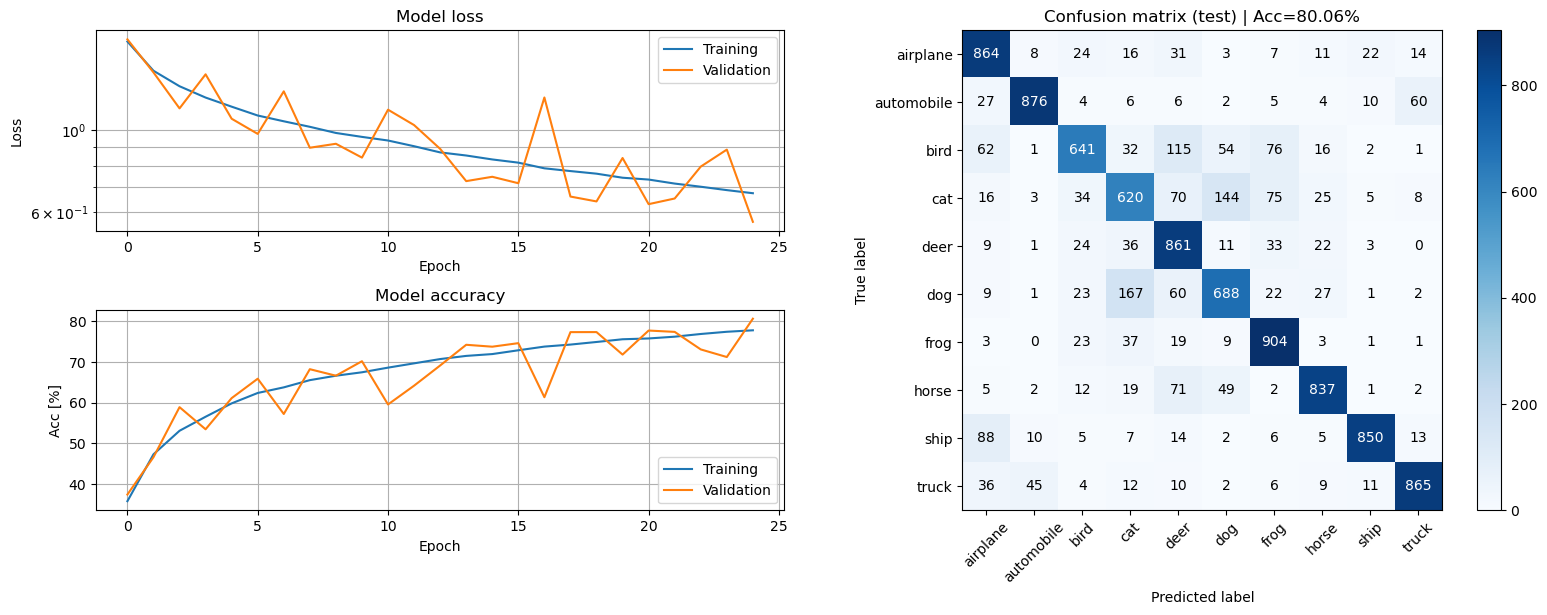

In [24]:
PlotModelEval(model, history, X_test, y_test, cifar_labels)

#### **<span style="color:red">Question 8:</span>**
Design and train a model that achieves at least 75% test accuracy in at most 25 epochs. Explain your model architecture and motivate the design choices you have made.

#### **<span style="color:green">Answer:</span>**
The final model which gives us the 75% accuracy is consist of 3 blocks of layers of the form **[conv - batchnorm - activation - pooling - dropout]** with filters as 64, 128, 256 respectively with a kernel size of(3, 3)in each convolution layer. Then Bath normalization is applied to normalise and stabilise the training. The output will be passed by ReLU activation to introduce non-linearity, so that the network can learn the complex relationship between input and output. Which is then passed through the pooling layer and dropout to prevent the overfitting. Output from convolution blocks will be flattened and passed through the fully connected network of 2 dense layers containing 128, 64 nodes respectively. The fully connected network will perform the feature extraction and transformation.
Motivation behind this architecture is the convolution layers with increasing filter size will extract the herirchial features with increasing complexity. Then followed by a fully connected network which reduces the dimensionality of feature space and extracts the high level features followed by softmax activation in output layer provides the probability for different classes.

---

### **Want some extra challenge?**
For those of you that want to get creative, here are some things to look into. But note that we don't have the answers here. Any of these might improve the performance, or might not, or it might only work in combination with each other. This is up to you to figure out. This is how deep learning research often happens, trying things in a smart way to see what works best.
* Tweak or change the optimizer or training parameters.
* Tweak the filter parameters, such as numbers and sizes of filters.
* Use other activation functions.
* Add L1/L2 regularization (see https://www.tensorflow.org/api_docs/python/tf/keras/regularizers)
* Include layers that we did not cover here (see https://www.tensorflow.org/api_docs/python/tf/keras/layers). For example, our best model uses the global pooling layers.
* Take inspiration from some well-known architectures, such as ResNet or VGG16. (But don't just copy-paste those architectures. For one, what's the fun in that? Also, they take a long time to train, you will not have time.)
* Use explicit model ensembing (training multiple models that vote on or average the outputs - this will also take a lot of time.)
* Use data augmentation to create a larger training set (see https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator).

In [25]:

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

x_in = Input(shape=X_train.shape[1:])

x = ???

model = Model(inputs=x_in, outputs=x)

# You can also change this if you want
sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)

# Print the summary and model image
model.summary(100)
plot_model(model, show_shapes=True, show_layer_names=False)

# ============================================


SyntaxError: invalid syntax (54620283.py, line 7)

In [ ]:
history = model.fit(X_train, y_train_c, batch_size=32, epochs=5, verbose=1, validation_split=0.2)

In [ ]:
PlotModelEval(model, history, X_test, y_test, cifar_labels)